In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data,encoding="utf-8")
ride_df = pd.read_csv(ride_data,encoding="utf-8")

# Combine the data into a single dataset
pyber_df = pd.merge(city_df, ride_df, how='inner', on='city')

# Display the data table for preview
pyber_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

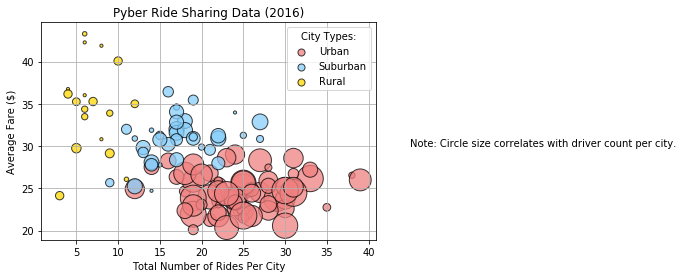

<Figure size 432x288 with 0 Axes>

In [18]:
# Obtain the x and y coordinates for each of the three city types
x_axis_raw = pyber_df[['type','city','ride_id']]
x_axis_group = x_axis_raw.groupby(['type','city'])
x_axis = x_axis_group.count()
x_axis

y_axis_raw = pyber_df[['type','city','fare']]
y_axis_group = y_axis_raw.groupby(['type','city'])
y_axis = y_axis_group.mean()
y_axis

size_axis_raw = pyber_df[['type','city','driver_count']]
size_axis_group = size_axis_raw.groupby(['type','city'])
size_axis = size_axis_group.max()
size_axis

# Build the scatter plots for each city types
urban_type = plt.scatter(x_axis.loc['Urban',:], y_axis.loc['Urban',:], size_axis.loc['Urban',:]*10,color="lightcoral",label="Urban",alpha=0.75,edgecolor="black")
suburban_type= plt.scatter(x_axis.loc['Suburban',:], y_axis.loc['Suburban',:], size_axis.loc['Suburban',:]*10,color="lightskyblue",label="Suburban",alpha=0.75,edgecolor="black")
rural_type = plt.scatter(x_axis.loc['Rural',:], y_axis.loc['Rural',:], size_axis.loc['Rural',:]*10,color="gold",label="Rural",alpha=0.75,edgecolor="black")

# Incorporate the other graph properties
plt.grid(which='both',axis='both')
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(handles=[urban_type,suburban_type,rural_type], loc=1, title="City Types:")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(45,30,s="Note: Circle size correlates with driver count per city.")

# Save and Show Figure
plt.show()
plt.savefig("PyberBubblePlot.png")

## Total Fares by City Type

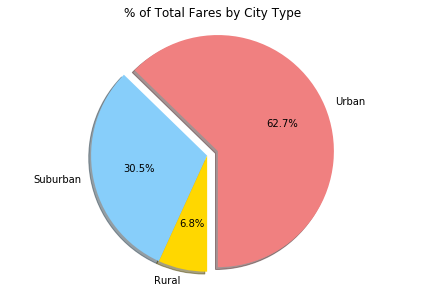

<Figure size 432x288 with 0 Axes>

In [17]:
# Calculate Type Percents
total_fare = pyber_df['fare'].sum()
total_fare

fare_by_type = pyber_df[['type','fare']]
sfare_by_type = fare_by_type.groupby('type').sum()
sfare_by_type['% of total'] = sfare_by_type['fare']/total_fare
sorted = sfare_by_type.sort_values(['% of total'], ascending=False)

labels = ["Urban","Suburban","Rural"]
percentage = sorted['% of total']
explode = [0.1,0,0]
colors = ["lightcoral","lightskyblue","gold"]

# Build Pie Chart
plt.pie(percentage, explode=explode, labels=labels, colors=colors, startangle=270, shadow=True, autopct='%1.1f%%')
plt.axis("equal")
plt.tight_layout()
plt.title("% of Total Fares by City Type")
# Save Figure
plt.show()
plt.savefig("TotalFaresByCityType.png")

## Total Rides by City Type

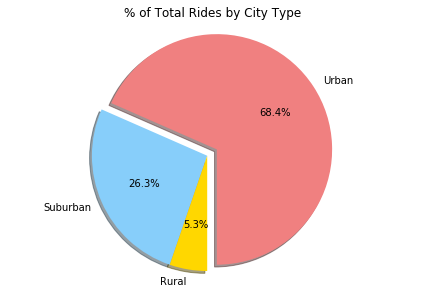

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate Ride Percents
total_rides = pyber_df['ride_id'].count()
total_rides

rides_by_type = pyber_df[['type','ride_id']]
rides_sum_by_type = rides_by_type.groupby('type').count()
rides_sum_by_type['% of total'] = rides_sum_by_type['ride_id']/total_rides
rides_sorted = rides_sum_by_type.sort_values(['% of total'], ascending=False)
rides_sorted

labels = ["Urban","Suburban","Rural"]
ride_percentage = rides_sorted['% of total']
explode = [0.1,0,0]
colors = ["lightcoral","lightskyblue","gold"]

# Build Pie Chart
plt.pie(ride_percentage, explode=explode, labels=labels, colors=colors, startangle=270, shadow=True, autopct='%1.1f%%')
plt.axis("equal")
plt.tight_layout()
plt.title("% of Total Rides by City Type")
# Save Figure
plt.show()
plt.savefig("TotalRidesByCityType.png")

## Total Drivers by City Type

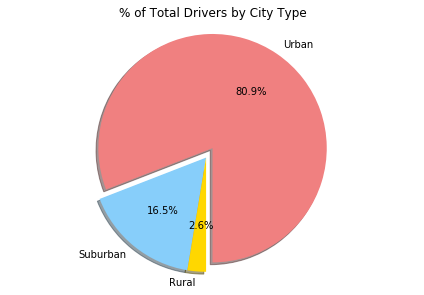

<Figure size 432x288 with 0 Axes>

In [15]:
# Calculate Driver Percents

drivers_raw = pyber_df[['type','city','driver_count']]
drivers_raw

drivers_by_city = drivers_raw.groupby(['type','city']).first()
drivers_by_city

total_drivers = drivers_by_city['driver_count'].sum()
total_drivers

drivers_by_type = drivers_by_city.groupby('type').sum()
drivers_by_type

drivers_by_type['% of total'] = drivers_by_type['driver_count']/total_drivers
drivers_by_type

drivers_sorted = drivers_by_type.sort_values(['% of total'], ascending=False).reset_index()
drivers_sorted

labels = ['Urban','Suburban','Rural']
driver_percentage = drivers_sorted['% of total']
explode = [0.1,0,0]
colors = ["lightcoral","lightskyblue","gold"]

# Build Pie Chart
plt.pie(driver_percentage, explode=explode, labels=labels, colors=colors, startangle=270, shadow=True, autopct='%1.1f%%')
plt.axis("equal")
plt.tight_layout()
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.show()
plt.savefig("TotalDriversByCityType.png")